### [Содержание](#Содержание)  <a name="Содержание"></a>
#### [Описание проекта](#Описаниепроекта)  
#### [Описание данных](#Описаниеданных)  
#### [Шаг 1. Знакомство с данными и изучение общей информации](#Шаг1)  
- 
[Таблица users](#Шаг1.1)  
- 
[Таблица calls](#Шаг1.2)  
- 
[Таблица messages](#Шаг1.3)  
- 
[Таблица internet](#Шаг1.4)  
- 
[Таблица tariffs](#Шаг1.5)  
- 
[Вывод](#Шаг1.6)  

#### [Шаг 2. Подготовка данных](#Шаг2)

- 
[Исправление ошибки в данных](#Шаг2.2) 
- 
[Приведение данных к нужным типам](#Шаг2.1)  
- 
[Объединение таблиц](#Шаг2.0)  
- 
[Вывод](#Шаг2.3) 

#### [Шаг 3. Анализ данных](#Шаг3)  
- 
[Вывод](#Шаг3.1)  

#### [Шаг 4. Проверка гипотезы](#Шаг4)  
- 
[Средняя выручка пользователей тарифов «Ультра» и «Смарт»](#Шаг4.1)  
- 
[Cредняя выручка пользователей из Москвы и других регионов](#Шаг4.2)  

#### [Шаг 5. Общий вывод](#Шаг5)

### Шаг 1. Знакомство с данными и изучение общей информации <a name="Шаг1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime as dt
from scipy import stats as st
import math

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
tariffs = pd.read_csv('/datasets/tariffs.csv')

#### Таблица users<a name="Шаг1.1"></a> (информация о пользователях):
- 
user_id — уникальный идентификатор пользователя
- 
first_name — имя пользователя
- 
last_name — фамилия пользователя
- 
age — возраст пользователя (годы)
- 
reg_date — дата подключения тарифа (день, месяц, год)
- 
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- 
city — город проживания пользователя
- 
tariff — название тарифного плана



In [3]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [4]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
#Проверка на дубликаты
users.duplicated().sum()

0

В таблице **users** пропуски только в столбце *churn_date* - незаполнено, посколько тарифом пользовались на момент выгрузки данных.  

#### Таблица calls<a name="Шаг1.2"></a>(информация о звонках):
- 
id — уникальный номер звонка
- 
call_date — дата звонка
- 
duration — длительность звонка в минутах
- 
user_id — идентификатор пользователя, сделавшего звонок



In [7]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [8]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
#Проверка на дубликаты
calls.duplicated().sum()

0

В таблице **calls** пропусков нет, но нужно округлить в большую сторону длительность звонков, так как «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. После этого изменим формат столбца  *duration*  на целочисленный.  

#### Таблица messages<a name="Шаг1.3"></a> (информация о сообщениях):
- 
id — уникальный номер сообщения
- 
message_date — дата сообщения
- 
user_id — идентификатор пользователя, отправившего сообщение



In [11]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [12]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
#Проверка на дубликаты
messages.duplicated().sum()

0

Таблица **messages** на первый взгляд не требует корректировок.  


#### Таблица internet<a name="Шаг1.4"></a>(информация об интернет-сессиях):
- 
id — уникальный номер сессии
- 
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- 
session_date — дата интернет-сессии
- 
user_id — идентификатор пользователя



In [15]:
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [16]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [18]:
#Проверка на дубликаты
internet.duplicated().sum()

0

В таблице **internet** пропусков нет, но нужно округлить в большую сторону потраченый интернет-трафик, так как «Мегалайн» всегда округляет вверх значения мегабайтов. После этого изменим формат столбца *mb_used* на целочисленный.  *Unnamed: 0* что-то лишнее.


#### Таблица tariffs<a name="Шаг1.5"></a> (информация о тарифах):
- 
tariff_name — название тарифа
- 
rub_monthly_fee — ежемесячная абонентская плата в рублях
- 
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- 
messages_included — количество сообщений в месяц, включённых в абонентскую плату
- 
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- 
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- 
rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- 
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [19]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [20]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица **tariffs** на первый взгляд не требует корректировок.

#### Вывод:  <a name="Шаг1.6"></a>

В таблице **users** пропуски только в столбце *churn_date* - незаполнено, посколько тарифом пользовались на момент выгрузки данных, но этот столбец не понадобится для анализа в дальнейшем. Привести к типу datetime дату.  
В таблице **calls** пропусков нет, но нужно округлить в большую сторону длительность звонков, так как «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. После этого изменим формат столбца  *duration*  на целочисленный. Привести к типу datetime дату.    
Таблица **messages** на первый взгляд не требует корректировок. Привести к типу datetime дату.    
В таблице **internet** пропусков нет, но нужно округлить в большую сторону потраченый интернет-трафик, так как «Мегалайн» всегда округляет вверх значения мегабайтов. После этого изменим формат столбца *mb_used* на целочисленный. *Unnamed:0* что-то лишнее. Привести к типу datetime дату.    
Таблица **tariffs** на первый взгляд не требует корректировок.

### Шаг 2. Подготовка данных<a name="Шаг2"></a>

##### Исправление ошибки в данных<a name="Шаг2.2"></a>

In [21]:
#Округляю значения слобца длительность разговоров в большую сторону и добавляю по 1 к нулевому значению,
#так как звонок начался и тариф посчитал эту минуту
calls['duration'] = calls['duration'].apply(np.ceil)
calls.loc[calls.duration == 0, 'duration'] += 1

Нули считаю за единицы, так как эти нули считаю за неначатый разговор, то есть звонок уже начался и действие "звонок" выполнено, вышки связи начали работать, но возможно абонент не взял трубку или передумали звонить. Поскольку процесс звонка был запущен округляем его до минуты.

In [22]:
#Округляю значения слобца интернет-трафик в большую сторону 
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

Значения равные 0 оставляю не тронутыми, так как пользователь скорее всего не пользовался интернетом.

##### Приведение данных к нужным типам<a name="Шаг2.1"></a>

In [23]:
#Привожу значения к целочисленному типу и datetime
calls['duration'] = calls['duration'].astype(int)
internet['mb_used'] = internet['mb_used'].astype(int)
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

##### Объединение таблиц <a name="Шаг2.0"></a>

In [24]:
#Группировка данных о звонках по пользователям и месяцу
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year

calls_grouped = calls.groupby(['user_id', 'month', 'year']).agg({'duration':'sum'}) 
calls_grouped

duration
user_id month year          
1000    5     2018       164
        6     2018       187
        7     2018       346
        8     2018       418
        9     2018       478
...                      ...
1498    10    2018       258
1499    9     2018        71
        10    2018       473
        11    2018       624
        12    2018       505

[3174 rows x 1 columns]

In [25]:
#Группировка данных о интернет-трафике по пользователям и месяцу
internet ['month'] = internet ['session_date'].dt.month
internet ['year'] = internet ['session_date'].dt.year

internet_grouped = internet.groupby(['user_id', 'month', 'year']).agg({'mb_used':'sum'}).reset_index()  
internet_grouped

,user_id,month,year,mb_used
0,1000,5,2018,2256
1,1000,6,2018,23257
2,1000,7,2018,14016
3,1000,8,2018,14070
4,1000,9,2018,14581
...,...,...,...,...
3198,1498,10,2018,20604
3199,1499,9,2018,1848
3200,1499,10,2018,17809
3201,1499,11,2018,17984


In [26]:
#Группировка данных о сообщениях по пользователям и месяцу
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year

messages_grouped = messages.groupby(['user_id', 'month', 'year']).agg({'id':'count'}).reset_index()
messages_grouped

,user_id,month,year,id
0,1000,5,2018,22
1,1000,6,2018,60
2,1000,7,2018,75
3,1000,8,2018,81
4,1000,9,2018,57
...,...,...,...,...
2712,1498,10,2018,42
2713,1499,9,2018,11
2714,1499,10,2018,48
2715,1499,11,2018,59


In [27]:
#Объединение таблиц по user_id, month и year
all_data = calls_grouped.merge(messages_grouped, on=['user_id','month', 'year'], how = 'left')
all_data = all_data.merge(internet_grouped, on=['user_id','month', 'year'], how = 'left')
all_data = all_data.merge(users, on = 'user_id', how = 'left')
all_data.columns = ['user_id', 'month', 'year', 'call_duration',
                    'no_of_messages', 'mb_used', 'age', 'churn_date',
                    'city', 'first_name', 'last_name', 'reg_date', 'tariff']

all_data.drop(['first_name', 'last_name'], axis='columns', inplace=True)
all_data

,user_id,month,year,call_duration,no_of_messages,mb_used,age,churn_date,city,reg_date,tariff
0,1000,5,2018,164,22.0,2256.0,52,NaN,Краснодар,2018-05-25,ultra
1,1000,6,2018,187,60.0,23257.0,52,NaN,Краснодар,2018-05-25,ultra
2,1000,7,2018,346,75.0,14016.0,52,NaN,Краснодар,2018-05-25,ultra
3,1000,8,2018,418,81.0,14070.0,52,NaN,Краснодар,2018-05-25,ultra
4,1000,9,2018,478,57.0,14581.0,52,NaN,Краснодар,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10,2018,258,42.0,20604.0,68,2018-10-25,Владикавказ,2018-07-19,smart
3170,1499,9,2018,71,11.0,1848.0,35,NaN,Пермь,2018-09-27,smart
3171,1499,10,2018,473,48.0,17809.0,35,NaN,Пермь,2018-09-27,smart
3172,1499,11,2018,624,59.0,17984.0,35,NaN,Пермь,2018-09-27,smart


Посчитайте для каждого пользователя:
- 
количество сделанных звонков и израсходованных минут разговора по месяцам;
- 
количество отправленных сообщений по месяцам;
- 
объем израсходованного интернет-трафика по месяцам;
- 
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).



In [49]:
#Количество сделанных звонков по месяцам
calls_sum_per_month = calls.groupby(['user_id', 'month', 'year']).agg({'id':'count'}).reset_index()
all_data['no_of_calls'] = calls_sum_per_month['id']
all_data[['user_id','month', 'no_of_calls']]

,user_id,month,no_of_calls
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58
...,...,...,...
3169,1498,10,41
3170,1499,9,9
3171,1499,10,68
3172,1499,11,74


In [29]:
#Количество израсходованных минут разговора по месяцам
all_data[['user_id', 'month', 'call_duration']]

,user_id,month,call_duration
0,1000,5,164
1,1000,6,187
2,1000,7,346
3,1000,8,418
4,1000,9,478
...,...,...,...
3169,1498,10,258
3170,1499,9,71
3171,1499,10,473
3172,1499,11,624


In [30]:
#Количество отправленных сообщений по месяцам
all_data[['user_id','month', 'no_of_messages']]

,user_id,month,no_of_messages
0,1000,5,22.0
1,1000,6,60.0
2,1000,7,75.0
3,1000,8,81.0
4,1000,9,57.0
...,...,...,...
3169,1498,10,42.0
3170,1499,9,11.0
3171,1499,10,48.0
3172,1499,11,59.0


In [31]:
#Объем израсходованного интернет-трафика по месяцам
all_data[['user_id','month', 'mb_used']]

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3169,1498,10,20604.0
3170,1499,9,1848.0
3171,1499,10,17809.0
3172,1499,11,17984.0


In [32]:
#Создаю сталбец перевода мегабайтов в гигабайты 
#для определения суммы дополнительной оплаты за сверх тарифный интернет-трафик, 
#так как оплата дополнительного трафика списывается по-гигабайтно
gb = all_data['mb_used'] / 1024
all_data['mb_to_gb'] = gb.apply(np.ceil)
all_data['mb_to_gb']

0        3.0
1       23.0
2       14.0
3       14.0
4       15.0
        ... 
3169    21.0
3170     2.0
3171    18.0
3172    18.0
3173    13.0
Name: mb_to_gb, Length: 3174, dtype: float64

In [33]:
#Помесячная выручка с каждого пользователя
def to_pay(tariffs_included, items_max, over_price ):
    if tariffs_included > items_max:
        return (tariffs_included - items_max) * over_price
    else:
        return 0

In [34]:
#Помесячная выручка с каждого пользователя
def revenue (row):
    if row['tariff'] == 'smart':
        over_calls = to_pay(row['call_duration'], 500, 3)
        over_message = to_pay(row['no_of_messages'], 50, 3)
        over_internet = to_pay(row['mb_to_gb'], 15, 200)
        rub_monthly_fee = 550
    else:
        over_calls = to_pay(row['call_duration'], 3000, 1)
        over_message = to_pay(row['no_of_messages'], 1000, 1)
        over_internet = to_pay(row['mb_to_gb'], 30, 150)
        rub_monthly_fee = 1950
    return (over_calls + over_message + over_internet) + rub_monthly_fee

all_data['revenue'] = all_data.apply(revenue, axis=1)
all_data[['user_id','month', 'revenue']]

,user_id,month,revenue
0,1000,5,1950.0
1,1000,6,1950.0
2,1000,7,1950.0
3,1000,8,1950.0
4,1000,9,1950.0
...,...,...,...
3169,1498,10,1750.0
3170,1499,9,550.0
3171,1499,10,1150.0
3172,1499,11,1549.0


In [35]:
all_data['revenue'].describe()

count    3174.000000
mean     1540.103970
std       805.017695
min       550.000000
25%       750.000000
50%      1669.000000
75%      1950.000000
max      6824.000000
Name: revenue, dtype: float64

In [36]:
all_data['revenue'].median()

1669.0

В среднем клиенты платят 1540 рублей.

### Вывод: <a name="Шаг2.3"></a>

В столбцах ***daration*** и ***mb_used*** (длительность разговора и потраченный интернет трафик соответственно) были переработаны, значения округлены в большую сторону, так как так считает компания, а также нулевые минуты приравнены к 1.  
Создан домолнительный столбец ***mb_to_gb*** где используемый интернет-трафик представлен в гигабайтах.  
Таблицы с данными о сообщениях, интрнет-трафике и звонках объединены в одну для более удобного анализа траты тарифа по пользователям по каждому месяцу.  
  
***Посчитано для каждого пользователя:***
- 
количество сделанных звонков и израсходованных минут разговора по месяцам;
- 
количество отправленных сообщений по месяцам;
- 
объем израсходованного интернет-трафика по месяцам;
- 
помесячная выручка с каждого пользователя.


In [37]:
all_data

,user_id,month,year,call_duration,no_of_messages,mb_used,age,churn_date,city,reg_date,tariff,no_of_calls,mb_to_gb,revenue
0,1000,5,2018,164,22.0,2256.0,52,NaN,Краснодар,2018-05-25,ultra,22,3.0,1950.0
1,1000,6,2018,187,60.0,23257.0,52,NaN,Краснодар,2018-05-25,ultra,43,23.0,1950.0
2,1000,7,2018,346,75.0,14016.0,52,NaN,Краснодар,2018-05-25,ultra,47,14.0,1950.0
3,1000,8,2018,418,81.0,14070.0,52,NaN,Краснодар,2018-05-25,ultra,52,14.0,1950.0
4,1000,9,2018,478,57.0,14581.0,52,NaN,Краснодар,2018-05-25,ultra,58,15.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10,2018,258,42.0,20604.0,68,2018-10-25,Владикавказ,2018-07-19,smart,41,21.0,1750.0
3170,1499,9,2018,71,11.0,1848.0,35,NaN,Пермь,2018-09-27,smart,9,2.0,550.0
3171,1499,10,2018,473,48.0,17809.0,35,NaN,Пермь,2018-09-27,smart,68,18.0,1150.0
3172,1499,11,2018,624,59.0,17984.0,35,NaN,Пермь,2018-09-27,smart,74,18.0,1549.0


### Шаг 3. Анализ данных<a name="Шаг3"></a>

Опишите поведение клиентов оператора, исходя из выборки.
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Сколько минут разговор требуется пользователям каждого тарифа в месяц  
Постройте гистограммы. Опишите распределения.

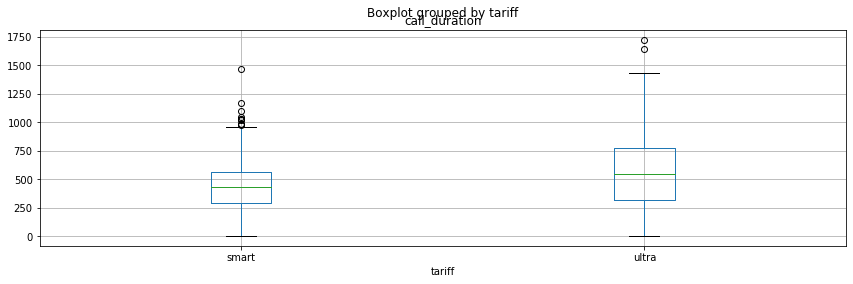

In [38]:
#Разброс значений столбца потраченых минут в зависимости от тарифа
all_data.boxplot('call_duration', by = 'tariff', figsize = (14, 4))

В тарифе ***смарт*** основное количество потраченых минут лежит в промежутке от 0 до 1000 минут, а в тарифе ***ультра*** от 0 до 1500 минут.

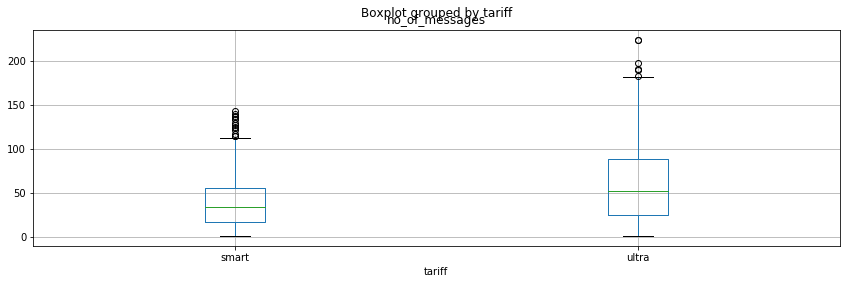

In [39]:
#Разброс значений столбца количества написанных сообщений в зависимости от тарифа

all_data.boxplot('no_of_messages', by = 'tariff', figsize = (14, 4))

В тарифе ***смарт*** основное количество написанных сообщений лежит в промежутке от 0 до 120 сообщения, а в тарифе ***ультра*** от 0 до 180 сообщений.

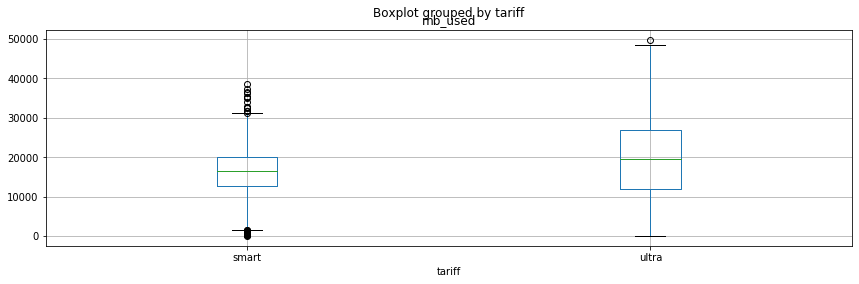

In [40]:
#Разброс значений столбца потраченного интернет-трафика в зависимости от тарифа

all_data.boxplot('mb_used', by = 'tariff', figsize = (14, 4))

В тарифе ***смарт*** основное количество потраченного интернет-трафика лежит в промежутке от 100 до 32000 мб, а в тарифе ***ультра*** от 0 до 45000 мб.

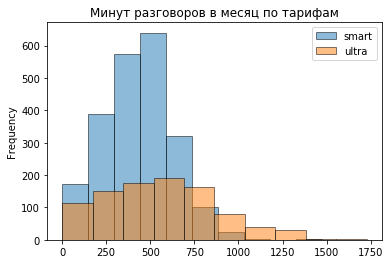

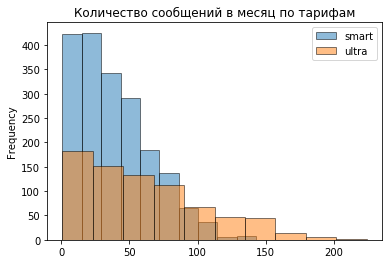

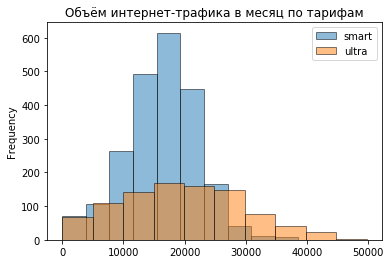

In [41]:
#Построение гистограмм минут разговоров, количества сообщений и объёма интернет-трафика,
#которые требуется пользователям каждого тарифа в месяц
hist_table = all_data[['call_duration', 'no_of_messages','mb_used']]
tar = all_data['tariff']
title = {'call_duration':'Минут разговоров в месяц по тарифам',
          'no_of_messages':'Количество сообщений в месяц по тарифам',
          'mb_used':'Объём интернет-трафика в месяц по тарифам'}

for row in hist_table:
    if row in hist_table:
        hist_table.groupby(tar)[row].plot.hist(alpha = 0.5, ec = 'black')
        
    plt.title(title[row])
    plt.legend()
    plt.show()
    

По частоте использования тарифов ***смарт*** и ультра видно, что тариф смарт популярнее своего конкурента, что логично, ведь у тарифа ***смарт*** ежемесячный платеж сильно ниже.  
  
***Минуты разговоров***  
  
Пользователи тарифа ***смарт***  чаще всего тратят от 300 до 620 мину, то есть на 120 минут привышают превышают пакет.   
Пользователи тарифа ***ультра***  чаще всего тратят от 375 до 875 мину, не привышают, но и не добирают до включенного пакета.  
  
Среднее находится на уровне медианы у обоих тарифов.
  
***Количество сообщений*** - самая непопулярная единица среди пользователей обоих тарифов, так как в обоих таривах показатели количества отправленных сообщений находятся больше всего у нуля.   
  
Пользователи тарифа ***смарт***  чаще всего отправляют от 0 до 25 сообщений.  
Пользователи тарифа ***ультра***  чаще всего отправляют от 0 до 80 сообщений.  
  
Датасет с положительной скошенностью, среднее больше медианы у обоих тарифов.
  
***Объем интернет-трафика***  
  
Пользователи тарифа ***смарт***  чаще всего используют от 12000 до 24000 мегабайт - превышают пакет, расчитанный на 15360 мегабайт.
Пользователи тарифа ***ультра***  чаще всего используют от 10000 до 30000 мегабайт - в рамках пакета, расчитанного на 30720 мегабайт.  
  
Среднее находится на уровне медианы у обоих тарифов.

In [42]:
#Среднее, стандартное отклонение и дисперсия звонков, сообщений и интернет-трафика по тарифам
all_data.pivot_table(index = 'tariff', values = ['call_duration','no_of_messages', 'mb_used'],
                     aggfunc = ['mean','std','var']).astype(int)






mean                                  std          \
       call_duration mb_used no_of_messages call_duration mb_used   
tariff                                                              
smart            430   16237             38           193    5874   
ultra            560   19687             61           314    9987   

                                var                           
       no_of_messages call_duration   mb_used no_of_messages  
tariff                                                        
smart              26         37577  34510888            719  
ultra              44         99062  99750819           1999

 Все среднии значения по тарифу ***ультра*** выше, чем по тарифу ***смарт*** и это логично, ведь в пакет тарифа ***ультра*** включено больше минут, сообщений и интернет-трафика, однако эти значения не сильно превышает среднии значения по тарифу ***смарт***.

<font color=green> Здорово. Можно также добавить параметры по выручке с каждого из тарифов. 
    
---

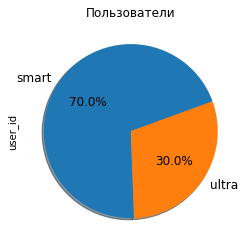

In [43]:
#Доля пользователей тарифов
all_data.groupby('tariff')['user_id'].count().plot(kind = 'pie',
                                                 shadow=True,title = 'Пользователи', startangle=20,
                                                 fontsize=12, autopct="%1.1f%%")

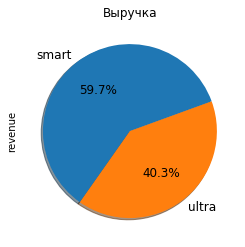

In [44]:
#Доля выручки тарифов
all_data.groupby('tariff')['revenue'].sum().plot(kind = 'pie',
                                                 shadow=True,title = 'Выручка', startangle=20,
                                                 fontsize=12, autopct="%1.1f%%")

Тариф ***смарт*** выгоднее как в использовании (70.0% пользователей выбирают тариф смарт), так и в выручке(приносит 59.7% всей выручки).  
Тариф ***ультра*** хоть и дороже своего соперника в несколько раз, проигрывает и по популярности(его выбирают всего лишь 30% поцента пользователей), и по прибыли (40,3% всей выручки), которые он приносит.

### Вывод:<a name="Шаг3.1"></a>

По частоте использования тарифов ***смарт*** и ультра видно, что тариф смарт популярнее своего конкурента, что логично, ведь у тарифа ***смарт*** ежемесячный платеж сильно ниже.  
  
***Минуты разговоров***  
  
Пользователи тарифа ***смарт***  чаще всего тратят от 300 до 620 мину, то есть на 120 минут привышают превышают пакет.   
Пользователи тарифа ***ультра***  чаще всего тратят от 375 до 875 мину, не привышают, но и не добирают до включенного пакета.  
  
Среднее находится на уровне медианы у обоих тарифов.
  
***Количество сообщений*** - самая непопулярная единица среди пользователей обоих тарифов, так как в обоих таривах показатели количества отправленных сообщений находятся больше всего у нуля.   
  
Пользователи тарифа ***смарт***  чаще всего отправляют от 0 до 25 сообщений.  
Пользователи тарифа ***ультра***  чаще всего отправляют от 0 до 80 сообщений.  
  
Датасет с положительной скошенностью, среднее больше медианы у обоих тарифов.
  
***Объем интернет-трафика***  
  
Пользователи тарифа ***смарт***  чаще всего используют от 12000 до 24000 мегабайт - превышают пакет, расчитанный на 15360 мегабайт.
Пользователи тарифа ***ультра***  чаще всего используют от 10000 до 30000 мегабайт - в рамках пакета, расчитанного на 30720 мегабайт.  
  
Среднее находится на уровне медианы у обоих тарифов.  
  
    
    
Все среднии значения по тарифу ***ультра*** выше, чем по тарифу ***смарт*** и это логично, ведь в пакет тарифа ***ультра*** включено больше минут, сообщений и интернет-трафика, однако эти значения не сильно превышает среднии значения по тарифу ***смарт***.

### Шаг 4. Проверка гипотезы<a name="Шаг4"></a>

Воспользуюсь т-тестом ttest_ind из модуля scipy.stats поскольку выборки независимые, а значений относительно. немного

- 
средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; <a name="Шаг4.1"></a>

In [45]:
# Нулевая гипотеза - средняя выручка пользователей тарифов ультра и смарт равна
# Алтернативная гипотеза - средняя выручка пользователей тарифов ультра и смарт различается

alpha = 0.05

tariff_smart = all_data.query('tariff == "smart"')['revenue']
tariff_ultra = all_data.query('tariff == "ultra"')['revenue']

results = st.ttest_ind(tariff_smart, tariff_ultra) 
print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 1.3096507569416545e-144
Отвергаем нулевую гипотезу


То есть мы не можем отвергнут альтернативную гипотезу, то есть средняя выручка пользователей тарифов ультра и смарт различается

In [46]:
tariff_smart = all_data.query('tariff == "smart"')['revenue'].mean()
tariff_ultra = all_data.query('tariff == "ultra"')['revenue'].mean()
tariff_ultra, tariff_smart

(2071.9242902208202, 1312.591093117409)

После проверки видно, что разница действительно есть, к томуже тариф ***ультра*** номинально в несколько раз дороже смарта, это еще не говорит о том, что ***смарт*** приносит больше выручки в общем.

- 
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов; <a name="Шаг4.2"></a>

In [47]:
# Нулевая гипотеза - средняя выручка пользователей из Москвы и других регионов равна
# Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

alpha = 0.05

Moscow = all_data.query('city == "Москва"')['revenue']
Others = all_data.query('city != "Москва"')['revenue']

results = st.ttest_ind(Moscow, Others)
print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 0.4986854643598172
Не получилось отвергнуть нулевую гипотезу


То есть мы не отвергаем нулевую гипотезу про равенство выручки из Москвы и регионов, значит средняя выручка из Москвы и регионов могут быть равны.

In [48]:
#Проверяю разницу средней выручки по Москве и регионам
Moscow = all_data.query('city == "Москва"')['revenue'].mean()
Others = all_data.query('city != "Москва"')['revenue'].mean()

Moscow - Others

24.540193345438638

Разница в выручке Москвы и регионов слишком мала, что бы по выборке можно было бы утверждать, что она отличается.

### Вывод:


### Шаг 5. Общий вывод<a name="Шаг5"></a>

В столбцах ***daration*** и ***mb_used*** (длительность разговора и потраченный интернет трафик соответственно) были переработаны, значения округлены в большую сторону, так как так считает компания, а также нулевые минуты приравнены к 1.  
Создан домолнительный столбец ***mb_to_gb*** где используемый интернет-трафик представлен в гигабайтах.  
Таблицы с данными о сообщениях, интрнет-трафике и звонках объединены в одну для более удобного анализа траты тарифа по пользователям по каждому месяцу.  
  
***Посчитано для каждого пользователя:***
- 
количество сделанных звонков и израсходованных минут разговора по месяцам;
- 
количество отправленных сообщений по месяцам;
- 
объем израсходованного интернет-трафика по месяцам;
- 
помесячная выручка с каждого пользователя.



По частоте использования тарифов ***смарт*** и ультра видно, что тариф смарт популярнее своего конкурента, что логично, ведь у тарифа ***смарт*** ежемесячный платеж сильно ниже.  
  
***Минуты разговоров***  
  
Пользователи тарифа ***смарт***  чаще всего тратят от 300 до 620 мину, то есть на 120 минут привышают превышают пакет.   
Пользователи тарифа ***ультра***  чаще всего тратят от 375 до 875 мину, не привышают, но и не добирают до включенного пакета.  
  
Среднее находится на уровне медианы у обоих тарифов.
  
***Количество сообщений*** - самая непопулярная единица среди пользователей обоих тарифов, так как в обоих таривах показатели количества отправленных сообщений находятся больше всего у нуля.   
  
Пользователи тарифа ***смарт***  чаще всего отправляют от 0 до 25 сообщений.  
Пользователи тарифа ***ультра***  чаще всего отправляют от 0 до 80 сообщений.  
  
Датасет с положительной скошенностью, среднее больше медианы у обоих тарифов.
  
***Объем интернет-трафика***  
  
Пользователи тарифа ***смарт***  чаще всего используют от 12000 до 24000 мегабайт - превышают пакет, расчитанный на 15360 мегабайт.
Пользователи тарифа ***ультра***  чаще всего используют от 10000 до 30000 мегабайт - в рамках пакета, расчитанного на 30720 мегабайт.  
  
Среднее находится на уровне медианы у обоих тарифов.  
  
    
    
Все среднии значения по тарифу ***ультра*** выше, чем по тарифу ***смарт*** и это логично, ведь в пакет тарифа ***ультра*** включено больше минут, сообщений и интернет-трафика, однако эти значения не сильно превышает среднии значения по тарифу ***смарт***.


Cредняя выручка пользователей тарифов ***ультра*** и ***смарт*** различается.  
Cредняя выручка из Москвы и регионов могут быть равны, поскольку выборка мала, для того что бы утверждать обратоное.

Исходя из выборки средняя выручка пользователей тарифов ***ультра*** и ***смарт*** различается.  
Средняя выручка из Москвы и регионов могут быть равны, поскольку выборка показывает незначительное различие по выручке, это может оказаться случайностью.


Тариф ***смарт*** выгоднее как в использовании (70.0% пользователей выбирают тариф смарт), так и в выручке(приносит 59.7% всей выручки).  
Тариф ***ультра*** хоть и дороже своего соперника в несколько раз, проигрывает и по популярности(его выбирают всего лишь 30% поцентов пользователей), и по прибыли (40,3% всей выручки), которые он приносит.